In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
#tf.get_logger().setLevel('ERROR') # turn off tf warnings 
import tensorflow as tf
import glob
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import XGBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from xgboost import XGBClassifier

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# prepare numerical data

In [ ]:
train = pd.read_csv(r'/content/drive/MyDrive/machine_learning_project /train.csv')

In [ ]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

balanced class

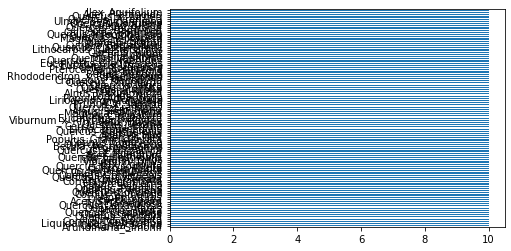

In [ ]:
train['species'].value_counts().plot(kind = 'barh')
plt.show()

In [ ]:
test = pd.read_csv(r'/content/drive/MyDrive/machine_learning_project /test.csv')

In [ ]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.001953,0.007812,0.031250,0.009766,...,0.014648,0.017578,0.000977,0.002930,0.034180,0.010742,0.031250,0.052734,0.0009

get x and y from raw data

In [ ]:
Y_id = train.pop('id')

Y_label = train.pop('species')

test_id = test.pop('id')

X = train.values

X_test = test.values

normalize data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_testS = scaler.transform(X_test)

split training set to training and validation

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=233, test_size=0.2)

In [ ]:
#from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_label = pd.Series(encoder.fit_transform(Y_label))

#x_train, x_valid, y_train, y_valid
train_ID, valid_ID = next(sss.split(X_scaled, y_label))

In [ ]:
X_train, y_train = X_scaled[train_ID], y_label[train_ID]

X_valid, y_valid = X_scaled[valid_ID], y_label[valid_ID]

In [ ]:
train_id = Y_id[train_ID]
train_species = Y_label[train_ID]

valid_id = Y_id[valid_ID]
valid_species = Y_label[valid_ID]

# ml example, xg boosting with grid search

In [ ]:
xg = XGBClassifier(random_state=1)
xg.fit(X_train, y_train)
pred_xg = xg.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [ ]:
pred_xg_train = xg.predict(X_train)

print(classification_report(y_true=y_train, y_pred=pred_xg_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
          17       1.00    

In [ ]:
sorted_index_xg=xg.feature_importances_.argsort()[-10:]
sorted_index_xg

array([ 21,  53, 177,  71, 188,  58, 169, 121,  15,  69])

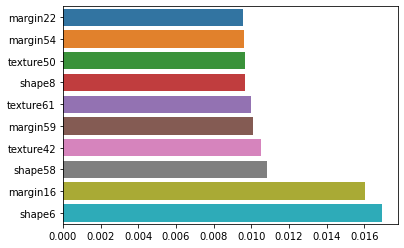

In [ ]:
sns.barplot(xg.feature_importances_[sorted_index_xg], train.columns[sorted_index_xg])

In [ ]:
xg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
xg= XGBClassifier(random_state=0)
# create a dictionary of parameters
params = {
    'n_estimators': list(np.arange(100, 500, 100)),
    'learning_rate': list(np.arange(0.1, 0.5, 0.2)),
    'max_depth': [1, 3],
    'gamma': [0, 1]
    }
# create grid search object with various combinations of parameters
search_xg= GridSearchCV(xg, params, cv=3, scoring = 'accuracy', refit = True, n_jobs=-1, verbose = 5)
search_xg.fit(X_train, y_train) 


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 50.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 1],
                         'learning_rate': [0.1, 0.30000000000000004],
                         'max_depth': [1, 3],
                     

In [ ]:
search_xg_best= search_xg.best_estimator_ 
search_xg_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.30000000000000004, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xg = search_xg_best.predict(X_valid)
y_pred_xg

array([88, 84, 90, 24, 92, 90,  9, 27, 67, 80, 43, 78, 53, 32, 51, 70, 62,
        0, 79, 71, 61, 23, 45, 98, 18, 51, 65, 45, 46, 91, 56, 62,  8, 63,
        5, 87, 55, 28, 38, 38,  3, 96, 73, 53, 91, 11, 83, 71, 20, 48, 17,
        2, 45, 21, 59, 58, 66, 68, 52, 98, 24, 12, 75, 60, 29, 83, 82, 15,
       50,  3, 46, 59, 31, 40, 34, 86, 29, 49, 68, 93, 26, 11, 80, 36, 81,
       39, 95,  5, 97, 28, 44, 93, 52, 66,  4, 69, 94, 35, 20, 19, 15, 94,
       47, 13, 37, 77, 43, 47, 79, 72, 64,  2, 23, 10, 44, 37,  4, 97, 17,
       78, 82, 81, 76, 14, 30, 48, 75, 19, 72, 25, 88, 69, 49,  3, 77, 22,
       32, 41, 68, 37, 95, 72, 22,  7, 86, 63, 10, 25,  6, 65, 89, 68, 50,
       89, 55,  1,  7, 31, 75, 51, 57, 16, 74, 35, 42, 16, 54, 66, 17,  0,
       96,  0, 31, 97,  8, 14, 87, 21,  1, 12, 67, 13, 33, 34, 41, 75, 30,
       42, 33, 57, 40,  6, 54, 23, 76, 84, 85, 60])

In [ ]:
print(classification_report(y_valid, y_pred_xg))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       0.67    

In [ ]:
y_pred_xg_train = search_xg_best.predict(X_train)
print(classification_report(y_train,y_pred_xg_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
          17       1.00    

In [ ]:
sorted_index_xg=xg.feature_importances_.argsort()[-10:]
sorted_index_xg

In [ ]:
sns.barplot(xg.feature_importances_[sorted_index_xg], train.columns[sorted_index_xg])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
xg= GradientBoostingClassifier(random_state=0)
# create a dictionary of parameters
params = {
    'n_estimators': (100, 200),
    'learning_rate': list(np.arange(0.1, 0.3, 0.1)),
    'max_depth': [1, 2]
    }
# create randomized search object with various combinations of parameters
search_xg= GridSearchCV(xg, params, cv=3, scoring = 'accuracy', refit = True, n_jobs=-1, verbose = 5)
#search_xg.fit(X_train, y_train) 

In [ ]:
search_xg.fit(X_train, y_train) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 17.6min


In [ ]:
xg= GradientBoostingClassifier(random_state=0)

In [ ]:
search_xg_best= search_xg.best_estimator_ 
search_xg_best

GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=0)

In [ ]:
y_prob_xgb = search_xg_best.predict_proba(X_valid)[:,1]
y_prob_xgb

array([0.00000000e+00, 1.16299598e-18, 2.12004973e-20, 1.36097834e-18,
       6.07488669e-19, 2.91711475e-18, 2.08398853e-10, 4.36164907e-13,
       2.72726419e-19, 1.18649925e-12, 8.92132855e-08, 1.36904198e-16,
       4.18345658e-15, 3.44885342e-12, 1.09424617e-16, 2.31638813e-11,
       7.11716650e-06, 2.24873109e-15, 5.13814926e-08, 4.15387057e-09,
       4.38493364e-20, 1.76525290e-10, 1.82550941e-06, 7.18262193e-07,
       4.79846300e-19, 2.79706372e-18, 1.46183202e-17, 1.86262471e-18,
       7.97559154e-09, 1.59133076e-11, 4.97091910e-16, 8.80511339e-13,
       1.03440131e-10, 2.62371294e-12, 3.63752329e-16, 8.42428330e-12,
       5.37894104e-11, 7.65641303e-07, 1.75187300e-18, 2.78982534e-14,
       8.52828665e-14, 1.40854822e-11, 5.41820983e-17, 3.55699274e-10,
       6.34328911e-12, 8.74485448e-11, 2.45192634e-10, 1.29122703e-14,
       1.30099691e-08, 5.07571177e-16, 1.15008890e-05, 4.44278676e-15,
       1.97911529e-18, 1.80196214e-08, 1.44835760e-14, 1.04961329e-05,
      

In [ ]:
y_pred_xgb = search_xg_best.predict(X_valid)
y_pred_xgb

array([57, 84, 90, 24, 92, 90,  9, 27, 67, 80, 43, 78, 53, 32, 51, 72, 62,
        0, 79, 63, 61, 54, 31, 98, 18, 51, 65, 84, 56, 91, 56, 62,  8, 80,
        5, 87, 55, 28, 38, 38,  3, 96, 73, 53, 91, 11,  3, 71, 49, 48, 73,
        2, 84, 21, 59, 94, 27, 68, 52, 98, 79, 41, 83, 27, 29, 83, 82, 15,
       50,  3, 46, 71, 45, 39, 34, 86, 29, 86, 79, 79, 26, 11, 70, 36, 81,
       39, 95,  5, 91, 28, 44,  8, 52, 66,  4,  3, 94, 35, 20, 20, 15, 94,
       47, 13, 39, 77, 43, 47, 79, 22, 56,  2, 23, 31, 45, 31,  4, 97, 17,
       56, 82, 96, 76, 14, 30, 48, 83, 19, 28, 25, 88, 65, 49, 54, 77, 22,
       64, 41, 68, 22, 95, 72, 22,  7, 69, 67, 10, 25,  6, 65, 89, 61,  3,
       89, 29,  1, 94, 31, 83, 51, 57,  8, 74, 33, 28, 69, 54, 66, 62, 11,
       96,  0, 31, 71,  8, 14, 87, 21,  1, 12, 67, 14, 33, 34, 41, 83, 30,
       79, 33, 57, 36,  6, 54, 50, 76, 29, 87, 91])

In [ ]:
confusion_matrix(y_true=y_valid, y_pred=y_pred_xgb)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [ ]:
print(classification_report(y_valid, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.40      1.00      0.57         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       0.50      1.00      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       1.00      0.50      0.67         2
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         2
          17       1.00    

In [ ]:
sorted_index_xgb=search_xg_best.feature_importances_.argsort()[-5:]
sorted_index_xgb

array([ 40,  35, 156, 128, 149])

In [ ]:
sns.barplot(search_xg_best.feature_importances_[sorted_index_xgb], X_train.columns[sorted_index_xgb])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
y_pred_xgb_train = search_xg_best.predict(X_train)
print(classification_report(y_train,y_pred_xgb_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
          17       1.00    

In [ ]:
# RF
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(random_state=0)

gbc.fit(X_train, y_train)

pred1 = gbc.predict(X_valid)

print(classification_report(y_true=y_valid, y_pred=pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.50      0.67         2
           8       0.67      1.00      0.80         2
           9       1.00      0.50      0.67         2
          10       0.50      0.50      0.50         2
          11       1.00      1.00      1.00         2
          12       0.50      0.50      0.50         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
          17       1.00    

# Adaboost with randomized search

In [ ]:
adaboost= AdaBoostClassifier(random_state=0)
# create a dictionary of parameters
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate':[0.2,0.4]
}
# create gridsearch object with various combinations of parameters
gridsearch_ada=  RandomizedSearchCV(adaboost, params, cv=3, scoring = 'accuracy', refit = True, n_jobs=-1, verbose = 5)
gridsearch_ada.fit(X_train, y_train)
search_ada_best= gridsearch_ada.best_estimator_ 
y_pred_ada = search_ada_best.predict(X_valid)
print(classification_report(y_valid, y_pred_ada))

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=0),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4],
                                        'n_estimators': [100, 200, 300]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=5)

In [ ]:
gridsearch_ada.fit(X_train, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.3s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   44.2s finished


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=5)

In [ ]:
search_ada_best= gridsearch_ada.best_estimator_ 
search_ada_best

AdaBoostClassifier(learning_rate=0.2, n_estimators=300, random_state=0)

In [ ]:
y_pred_ada = search_ada_best.predict(X_valid)
y_pred_ada

array([31, 44, 25, 23, 25, 25,  1, 44, 67, 60, 96,  5, 25, 25, 31, 25, 25,
       23, 25, 80, 61, 96, 96, 98, 18, 31, 32, 96, 31, 91, 31, 25, 25, 59,
       68, 96, 32, 25, 37, 96, 96, 96, 25, 25, 25, 11, 31, 80, 23, 48, 25,
       96, 96, 31, 59, 96, 44, 25, 25, 98, 18, 32, 44, 25, 25, 31, 96, 15,
       96, 25, 31, 59, 44, 96, 96, 25, 25,  8, 25, 32, 26, 13, 17, 96, 25,
       96, 95, 68, 91, 25, 25, 25, 25, 44,  4, 25, 96, 44, 23, 19, 15, 96,
       47, 13, 96, 31, 43, 47, 25, 60, 31, 96, 25, 25, 31, 37,  4, 97, 25,
       78, 59, 25, 96, 14, 25, 48, 75, 19, 72, 25, 31, 25, 25, 41, 25, 25,
       96, 41, 25, 96, 89, 68, 25,  7, 25, 71, 25, 25,  6, 65, 89, 61, 96,
       96, 25,  1, 25, 44, 75, 31, 96, 49, 75, 55, 96, 31, 25, 44, 25, 23,
       96, 23, 31, 21, 25, 14, 96, 68,  1, 32, 67,  8, 25, 96, 41, 31, 25,
       96, 25, 96, 96,  6, 32, 25, 37, 44, 41, 25])

In [ ]:
confusion_matrix(y_true=y_valid, y_pred=y_pred_ada)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [ ]:
print(classification_report(y_valid, y_pred_ada))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

In [ ]:
pred_ada = gridsearch_ada.predict(X_valid)

print(classification_report(y_true=y_valid, y_pred=pred_ada))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

In [ ]:
adaboost= AdaBoostClassifier(random_state=1)
adaboost.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [ ]:
pred_ada = adaboost.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=pred_ada))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

# Gradient Boosting 

In [ ]:
gradient= GradientBoostingClassifier(random_state=0)
# create a dictionary of parameters
params = {
    'n_estimators': [100, 200],
    'learning_rate':[0.2,0.4],
    'max_depth':[1,2]
}
# create gridsearch object with various combinations of parameters
gridsearch_gb= GridSearchCV(gradient, params, cv=3, scoring = 'accuracy', refit = True, n_jobs=-1, verbose = 5)
gridsearch_gb

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4], 'max_depth': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=5)

In [ ]:
gridsearch_gb.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed: 84.9min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 86.9min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4], 'max_depth': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=5)

In [ ]:
pred_gb = gridsearch_gb.predict(X_valid)

print(classification_report(y_true=y_valid, y_pred=pred_gb))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.29      1.00      0.44         2
           4       1.00      0.50      0.67         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.50      1.00      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      0.50      0.67         2
          11       0.50      0.50      0.50         2
          12       0.50      0.50      0.50         2
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

# image preparation

In [ ]:
import shutil
#create folder
original_path = 'images'

new_path = 'splited_images'

os.mkdir(new_path) # create this folder

train_dir = os.path.join(new_path,'train')
valid_dir = os.path.join(new_path, 'validation')


os.mkdir(train_dir)
os.mkdir(valid_dir)

def create_species_folder(path):
    for specie in Y_label.unique():
        specie_path = os.path.join(path, specie)
        os.mkdir(specie_path)

create_species_folder(train_dir)
create_species_folder(valid_dir)

def copy_image(idx, species, path):
    for i in idx.index:
        name = '{}.jpg'.format(idx.loc[i])
        specie = species.loc[i]
        specie_path = os.path.join(path, specie)
        src = os.path.join(original_path, name)
        dst = os.path.join(specie_path, name)
        shutil.copyfile(src, dst)

copy_image(train_id, train_species, train_dir)
copy_image(valid_id, valid_species, valid_dir)



In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                       horizontal_flip = True,
                                                       vertical_flip = True)

In [ ]:
target_size = (224, 224)
batch_size = 32
class_mode = 'categorical'

In [ ]:
training_set = datagen.flow_from_directory(directory= train_dir, 
                                           target_size= target_size, 
                                           batch_size= batch_size, 
                                           class_mode= class_mode)

Found 792 images belonging to 99 classes.


In [ ]:
valid_set = datagen.flow_from_directory(directory= valid_dir, 
                                        target_size= target_size, 
                                        batch_size= batch_size, 
                                        class_mode= class_mode)

Found 198 images belonging to 99 classes.


cnn example